In [36]:
import numpy as np

max_horizon = 250
n = 10
horizons=np.arange(max_horizon, -1, -max_horizon // n,)

In [37]:
import gymnasium as gym

In [44]:
env = gym.make("ALE/MsPacman-v5")

In [93]:
env = gym.make('ALE/MsPacman-v5', render_mode='human')

: 

In [55]:
# Create and wrap the environment
env = gym.make('ALE/MsPacman-v5-ram')  # Replace with your specific Pac-Man environment
env_name = EnvironmentName("ALE/MsPacman-v5")
env_kwargs = {}
normalize = False
seed = 0
frame_stack = 1
vec_env_type = "dummy"
vec_env_class = {"dummy": DummyVecEnv, "subproc": SubprocVecEnv}[vec_env_type]

spec = gym.spec(env_name.gym_id)

def make_env(**kwargs) -> gym.Env:
    return spec.make(**kwargs)

# Make the environment
env = make_atari_env(
    make_env,
    n_envs=8,
    seed=seed,
    vec_env_cls=vec_env_class,
    vec_env_kwargs=env_kwargs,
)
if frame_stack:
    env = VecFrameStack(env, n_stack=frame_stack)

if not is_vecenv_wrapped(env, VecTransposeImage):
    wrap_with_vectranspose = False
    if isinstance(env.observation_space, spaces.Dict):
        # If even one of the keys is an image-space in need of transpose, apply transpose
        # If the image spaces are not consistent (for instance, one is channel first,
        # the other channel last); VecTransposeImage will throw an error
        for space in env.observation_space.spaces.values():
            wrap_with_vectranspose = wrap_with_vectranspose or (
                is_image_space(space) and not is_image_space_channels_first(space)  # type: ignore[arg-type]
            )
    else:
        wrap_with_vectranspose = is_image_space(env.observation_space) and not is_image_space_channels_first(
            env.observation_space  # type: ignore[arg-type]
        )

    if wrap_with_vectranspose:
        print("Wrapping the env in a VecTransposeImage.")
        env = VecTransposeImage(env)

Wrapping the env in a VecTransposeImage.


In [89]:
import torch
file = torch.load("/Users/navyajain/Jumpstart-Pacman/expert5.chkpt")

file['model'].keys()

odict_keys(['online.0.weight', 'online.0.bias', 'online.2.weight', 'online.2.bias', 'online.4.weight', 'online.4.bias', 'target.0.weight', 'target.0.bias', 'target.2.weight', 'target.2.bias', 'target.4.weight', 'target.4.bias'])

In [91]:
from stable_baselines3 import DQN
model = DQN("CnnPolicy", env, verbose=1)

Using cpu device


/Users/navyajain/miniconda3/envs/rl_env/lib/python3.10/site-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 14.13GB > 1.51GB
  warnings.warn(


In [92]:
model.policy

CnnPolicy(
  (q_net): QNetwork(
    (features_extractor): NatureCNN(
      (cnn): Sequential(
        (0): Conv2d(1, 32, kernel_size=(8, 8), stride=(4, 4))
        (1): ReLU()
        (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
        (3): ReLU()
        (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
        (5): ReLU()
        (6): Flatten(start_dim=1, end_dim=-1)
      )
      (linear): Sequential(
        (0): Linear(in_features=3136, out_features=512, bias=True)
        (1): ReLU()
      )
    )
    (q_net): Sequential(
      (0): Linear(in_features=512, out_features=9, bias=True)
    )
  )
  (q_net_target): QNetwork(
    (features_extractor): NatureCNN(
      (cnn): Sequential(
        (0): Conv2d(1, 32, kernel_size=(8, 8), stride=(4, 4))
        (1): ReLU()
        (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
        (3): ReLU()
        (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
        (5): ReLU()
        (6): Flatten(start_dim=1, end_di

In [83]:
file["model"].keys()

odict_keys(['online.0.weight', 'online.0.bias', 'online.2.weight', 'online.2.bias', 'online.4.weight', 'online.4.bias', 'target.0.weight', 'target.0.bias', 'target.2.weight', 'target.2.bias', 'target.4.weight', 'target.4.bias'])

Wrapping the env in a VecTransposeImage.
Using cpu device


/Users/navyajain/miniconda3/envs/rl_env/lib/python3.10/site-packages/stable_baselines3/common/policies.py:486: UserWarning: As shared layers in the mlp_extractor are removed since SB3 v1.8.0, you should now pass directly a dictionary and not a list (net_arch=dict(pi=..., vf=...) instead of net_arch=[dict(pi=..., vf=...)])
  warnings.warn(


/Users/navyajain/miniconda3/envs/rl_env/lib/python3.10/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

(8, 1, 84, 84)


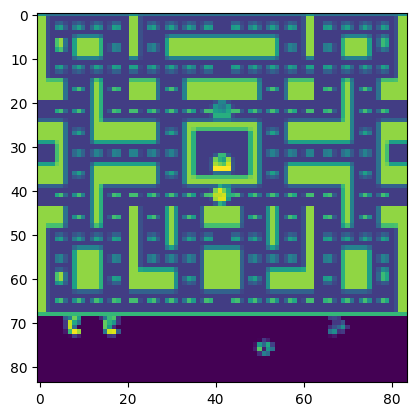

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [72]:
import gymnasium as gym
import numpy as np
from stable_baselines3.common.policies import ActorCriticPolicy
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C
from typing import Tuple, Any, Optional
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.env_util import make_atari_env, make_vec_env
from stable_baselines3.common.vec_env import (
    DummyVecEnv,
    SubprocVecEnv,
    VecEnv,
    VecFrameStack,
    VecNormalize,
    VecTransposeImage,
    is_vecenv_wrapped,
)
from huggingface_sb3 import EnvironmentName
from collections import OrderedDict
from stable_baselines3.common.preprocessing import is_image_space, is_image_space_channels_first
from gymnasium import spaces
import matplotlib.pyplot as plt

class ScriptedPacManPolicy(ActorCriticPolicy):
    def __init__(self, observation_space: gym.spaces.Space, action_space: gym.spaces.Space, *args, **kwargs):
        # Initialize the base policy
        super(ScriptedPacManPolicy, self).__init__(observation_space, action_space, *args, **kwargs,
                                                   net_arch=[dict(pi=[64, 64], vf=[64, 64])])

    def predict(self, observation: np.ndarray, state=None, episode_start=False, deterministic=False) -> Tuple[np.ndarray, Any]:
        """
        Predict the action for the given observation using a scripted policy.

        Parameters:
        - observation: The current state observation from the environment.
        - state: Optional state information (if any).
        - episode_start: Whether the current step is the beginning of a new episode.
        - deterministic: Whether the prediction should be deterministic.

        Returns:
        - action: The chosen action based on the observation.
        - state: Any state information (if applicable).
        """
        # observation = observation[0]
        # print(observation[2])
        print(observation.shape)

        observation = observation.reshape([observation.shape[0], observation.shape[2], observation.shape[3]])
        # show environment photo
        plt.imshow(observation.mean(axis=0))
        plt.show()

        
        agent_x, agent_y = observation[:2]  # Agent's position
        # print(agent_x.shape, agent_y.shape)
        # print(agent_x, agent_y)
        num_ghosts = int(observation.shape[1] - 2) // 2
        ghost_positions = observation[3:3 + num_ghosts * 2]
        remaining_observations = observation[3 + num_ghosts * 2:]
        pellet_positions = remaining_observations[:len(remaining_observations) // 2]
        power_pellet_positions = remaining_observations[len(remaining_observations) // 2:]

        # Define the possible actions
        actions = {
            0: 'NOOP',
            1: 'UP',
            2: 'RIGHT',
            3: 'LEFT',
            4: 'DOWN',
            5: 'UPRIGHT',
            6: 'UPLEFT',
            7: 'DOWNRIGHT',
            8: 'DOWNLEFT'
        }
        
        # Initialize variables for action selection
        safe_directions = set(range(9))  # All possible actions are initially safe
        
        # Avoid ghosts
        for i in range(0, len(ghost_positions), 2):
            ghost_x, ghost_y = ghost_positions[i], ghost_positions[i + 1]
            distance_to_ghost = abs(agent_x - ghost_x) + abs(agent_y - ghost_y)
            # Remove unsafe actions
            if distance_to_ghost <= 1:  # Adjust threshold as needed
                if agent_x == ghost_x:
                    if ghost_y > agent_y:
                        safe_directions.discard(4)  # DOWN
                    else:
                        safe_directions.discard(1)  # UP
                elif agent_y == ghost_y:
                    if ghost_x > agent_x:
                        safe_directions.discard(2)  # RIGHT
                    else:
                        safe_directions.discard(3)  # LEFT

        # Move towards the nearest pellet
        nearest_pellet_distance = float('inf')
        nearest_pellet_direction = None
        
        for i in range(0, len(pellet_positions), 2):
            pellet_x, pellet_y = pellet_positions[i], pellet_positions[i + 1]
            distance = abs(agent_x - pellet_x) + abs(agent_y - pellet_y)
            
            if distance < nearest_pellet_distance:
                nearest_pellet_distance = distance
                if agent_x < pellet_x:
                    if agent_y < pellet_y:
                        nearest_pellet_direction = 7  # DOWNRIGHT
                    elif agent_y > pellet_y:
                        nearest_pellet_direction = 5  # UPRIGHT
                    else:
                        nearest_pellet_direction = 2  # RIGHT
                elif agent_x > pellet_x:
                    if agent_y < pellet_y:
                        nearest_pellet_direction = 8  # DOWNLEFT
                    elif agent_y > pellet_y:
                        nearest_pellet_direction = 6  # UPLEFT
                    else:
                        nearest_pellet_direction = 3  # LEFT
                else:
                    if agent_y < pellet_y:
                        nearest_pellet_direction = 4  # DOWN
                    else:
                        nearest_pellet_direction = 1  # UP
        
        # Choose the final action
        if nearest_pellet_direction is not None and nearest_pellet_direction in safe_directions:
            action = nearest_pellet_direction
        else:
            # If no clear path to a pellet, choose a random safe direction
            action = np.random.choice(list(safe_directions))

        # Return the action and state
        return np.array([action]), state

# Create and wrap the environment
env = gym.make('ALE/MsPacman-v5')  # Replace with your specific Pac-Man environment
env_name = EnvironmentName("ALE/MsPacman-v5")
env_kwargs = {}
normalize = False
seed = 0
frame_stack = 1
vec_env_type = "dummy"
vec_env_class = {"dummy": DummyVecEnv, "subproc": SubprocVecEnv}[vec_env_type]

spec = gym.spec(env_name.gym_id)

def make_env(**kwargs) -> gym.Env:
    return spec.make(**kwargs)

# Make the environment
env = make_atari_env(
    make_env,
    n_envs=8,
    seed=seed,
    vec_env_cls=vec_env_class,
    vec_env_kwargs=env_kwargs,
)
if frame_stack:
    env = VecFrameStack(env, n_stack=frame_stack)

if not is_vecenv_wrapped(env, VecTransposeImage):
    wrap_with_vectranspose = False
    if isinstance(env.observation_space, spaces.Dict):
        # If even one of the keys is an image-space in need of transpose, apply transpose
        # If the image spaces are not consistent (for instance, one is channel first,
        # the other channel last); VecTransposeImage will throw an error
        for space in env.observation_space.spaces.values():
            wrap_with_vectranspose = wrap_with_vectranspose or (
                is_image_space(space) and not is_image_space_channels_first(space)  # type: ignore[arg-type]
            )
    else:
        wrap_with_vectranspose = is_image_space(env.observation_space) and not is_image_space_channels_first(
            env.observation_space  # type: ignore[arg-type]
        )

    if wrap_with_vectranspose:
        print("Wrapping the env in a VecTransposeImage.")
        env = VecTransposeImage(env)

# Create an instance of the A2C model using your custom policy
model = A2C(ScriptedPacManPolicy, env, verbose=1)

# Train the agent
model.learn(total_timesteps=10,
            log_interval=10,
            progress_bar=True,
            callback=EvalCallback(
                env, 
                n_eval_episodes=10, 
                best_model_save_path="a2c-pacman"))

# test the agent for mean reward
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=1)

# # Save the model
# model.save("a2c-pacman")

# # Load the model with the custom policy
# loaded_model = A2C.load("a2c-pacman", policy=ScriptedPacManPolicy)

In [41]:
# get obs space
obs_space = env.observation_space
obs_space

Box(0, 255, (210, 160, 3), uint8)

In [ ]:
# see env properties
print(env.observation_space)
print(env.action_space)
print(env.reward_range)
print(env.metadata)
# episodes length
print(env.spec.max_episode_steps)

In [ ]:
print(env.spec)

In [ ]:
from stable_baselines3.common.vec_env import (
    DummyVecEnv,
    SubprocVecEnv,
    VecEnv,
    VecFrameStack,
    VecNormalize,
    VecTransposeImage,
    is_vecenv_wrapped,
)

from huggingface_sb3 import EnvironmentName

In [ ]:
env_name = EnvironmentName("ALE/MsPacman-v5")

In [ ]:
spec = gym.spec(env_name.gym_id)
spec

In [ ]:
name = "ALE/MsPacman-v5"
env = gym.make(name)
env.spec

In [ ]:
from collections import OrderedDict
from stable_baselines3.common.env_util import make_atari_env, make_vec_env
from stable_baselines3.common.preprocessing import is_image_space, is_image_space_channels_first
from gymnasium import spaces

env_name = EnvironmentName("ALE/MsPacman-v5")
# custom_hyperparams = OrderedDict([('batch_size', 256),
#              ('clip_range', 'lin_0.1'),
#              ('ent_coef', 0.01),
#              ('env_wrapper',
#               ['stable_baselines3.common.atari_wrappers.AtariWrapper']),
#              ('frame_stack', 4),
#              ('learning_rate', 'lin_2.5e-4'),
#              ('n_envs', 8),
#              ('n_epochs', 4),
#              ('n_steps', 128),
#              ('n_timesteps', 500000.0),
#              ('policy', 'CnnPolicy'),
#              ('vf_coef', 0.5),
#              ('normalize', False)])
env_kwargs = {}
n_timesteps = 10
normalise = False
seed = 42
frame_stack = 4
vec_env_type = "dummy"
vec_env_class = {"dummy": DummyVecEnv, "subproc": SubprocVecEnv}[vec_env_type]

# Get environment spec
spec = gym.spec(env_name.gym_id)

def make_env(**kwargs) -> gym.Env:
    return spec.make(**kwargs)

# Make the environment
env = make_atari_env(
    make_env,
    n_envs=1,
    seed=seed,
    vec_env_cls=vec_env_class,
    vec_env_kwargs=env_kwargs,
)

if frame_stack:
    env = VecFrameStack(env, n_stack=frame_stack)

if not is_vecenv_wrapped(env, VecTransposeImage):
    wrap_with_vectranspose = False
    if isinstance(env.observation_space, spaces.Dict):
        # If even one of the keys is an image-space in need of transpose, apply transpose
        # If the image spaces are not consistent (for instance, one is channel first,
        # the other channel last); VecTransposeImage will throw an error
        for space in env.observation_space.spaces.values():
            wrap_with_vectranspose = wrap_with_vectranspose or (
                is_image_space(space) and not is_image_space_channels_first(space)  # type: ignore[arg-type]
            )
    else:
        wrap_with_vectranspose = is_image_space(env.observation_space) and not is_image_space_channels_first(
            env.observation_space  # type: ignore[arg-type]
        )

    if wrap_with_vectranspose:
        print("Wrapping the env in a VecTransposeImage.")
        env = VecTransposeImage(env)

In [ ]:
from stable_baselines3 import PPO

In [ ]:
model = PPO(
        "CnnPolicy",
        env,
        learning_rate = 2.5e-4,
        batch_size = 256,
        clip_range = 0.1,
        ent_coef = 0.01,
        vf_coef = 0.5,
        n_epochs = 4,
        n_steps = 128,
        verbose=1,
    )

In [ ]:
model.policy

In [ ]:
import torch
model = torch.load("/Users/navyajain/Jumpstart-Pacman/ppo/ALE-MsPacman-v5 copy/policy.pth", map_location=torch.device('cpu'))
# remove all keys with guide in them OrderedDict
keys = list(model.keys())
for key in keys:
    if 'guide' in key:
        del model[key]

# save it back
torch.save(model, "/Users/navyajain/Jumpstart-Pacman/ppo/ALE-MsPacman-v5 copy/policy.pth")

In [ ]:
import shutil
shutil.make_archive("v5", 'zip', "/Users/navyajain/Jumpstart-Pacman/ppo/ALE-MsPacman-v5_2")

In [ ]:
model = PPO.load("/Users/navyajain/Jumpstart-Pacman/examples/v5")

model_2 = PPO(
        "CnnPolicy",
        env,
        learning_rate = 2.5e-4,
        batch_size = 256,
        clip_range = 0.1,
        ent_coef = 0.01,
        vf_coef = 0.5,
        n_epochs = 4,
        n_steps = 128,
        verbose=1,
    )

# share the weights
model_2.policy.load_state_dict(model.policy.state_dict())

# save the model
model_2.save("/Users/navyajain/Jumpstart-Pacman/examples/ppo")

In [ ]:
model_2.policy

In [ ]:
# @title Video recording with stable baselines
# code thanks to Antonin RAFFIN
# will merge into stable baselines release in future release

#from stable_baselines.common.vec_env import VecVideoRecorder #test
from stable_baselines3.common.vec_env import VecEnvWrapper, DummyVecEnv, VecNormalize, VecFrameStack, SubprocVecEnv

class VecVideoRecorder(VecEnvWrapper):

    def __init__(self, venv, video_folder, record_video_trigger,
                 video_length=200, name_prefix='rl-video'):
        """
        Wraps a VecEnv or VecEnvWrapper object to record rendered image as mp4 video.
        It requires ffmpeg or avconv to be installed on the machine.
        :param venv: (VecEnv or VecEnvWrapper)
        :param video_folder: (str) Where to save videos
        :param record_video_trigger: (func) Function that defines when to start recording.
                                            The function takes the current number of step,
                                            and returns whether we should start recording or not.
        :param video_length: (int)  Length of recorded videos
        :param name_prefix: (str) Prefix to the video name
        """

        VecEnvWrapper.__init__(self, venv)

        self.env = venv
        # Temp variable to retrieve metadata
        temp_env = venv

        # Unwrap to retrieve metadata dict
        # that will be used by gym recorder
        while isinstance(temp_env, VecNormalize) or isinstance(temp_env, VecFrameStack):
            temp_env = temp_env.venv

        if isinstance(temp_env, DummyVecEnv) or isinstance(temp_env, SubprocVecEnv):
            metadata = temp_env.get_attr('metadata')[0]
        else:
            metadata = temp_env.metadata

        self.env.metadata = metadata

        self.record_video_trigger = record_video_trigger
        self.video_recorder = None

        self.video_folder = os.path.abspath(video_folder)
        os.makedirs(self.video_folder, exist_ok=True)

        self.name_prefix = name_prefix
        self.step_id = 0
        self.video_length = video_length

        self.recording = False
        self.recorded_frames = 0

    def reset(self):
        obs = self.venv.reset()
        self.start_video_recorder()
        return obs

    def start_video_recorder(self):
        self.close_video_recorder()

        video_name = '{}-step-{}-to-step-{}'.format(self.name_prefix, self.step_id,  self.step_id + self.video_length)
        base_path = os.path.join(self.video_folder, video_name)
        self.video_recorder = video_recorder.VideoRecorder(
                env=self.env,
                base_path=base_path,
                metadata={'step_id': self.step_id}
                )

        self.video_recorder.capture_frame()
        self.recorded_frames = 1
        self.recording = True

    def _video_enabled(self):
        return self.record_video_trigger(self.step_id)

    def step_wait(self):
        obs, rews, dones, infos = self.venv.step_wait()

        self.step_id += 1
        if self.recording:
            self.video_recorder.capture_frame()
            self.recorded_frames += 1
            if self.recorded_frames > self.video_length:
                logger.info("Saving video to ", self.video_recorder.path)
                self.close_video_recorder()
        elif self._video_enabled():
                self.start_video_recorder()

        return obs, rews, dones, infos

    def close_video_recorder(self):
        if self.recording:
            self.video_recorder.close()
        self.recording = False
        self.recorded_frames = 0

    def close(self):
        VecEnvWrapper.close(self)
        self.close_video_recorder()

    def __del__(self):
        self.close()

In [ ]:
import os
from gym.wrappers.monitoring import video_recorder
from stable_baselines3.common import logger
video_length = 6120 # @param

monitor_dir = "/Users/navyajain/Jumpstart-Pacman/examples/"

obs = env.reset()
env_id = 'MsPacmanNoFrameskip-v4'

env = VecVideoRecorder(env, "/Users/navyajain/Jumpstart-Pacman/examples/",
                       record_video_trigger=lambda x: x == 0, video_length=video_length,
                       name_prefix="trained-agent-{}".format(env_id))

env.reset()
timesteps = np.zeros((env.num_envs), dtype=np.int32)
for _ in range(video_length + 1):
    action, _states = model_2.predict(obs)
    obs, _, _, _ = env.step(action)
    print(_)
env.close()

In [ ]:
type(model)